# ★ 실무 실습) 배포 받은 "Loan-Status-Prediction"를 통해 자신만의 코드를 작성 해보자

1. 대출자가 상환할 가능성이 있는지를 분류하는 모델을 만들 것이다.
2. 하나의 포트폴리오가 될 수 있도록 시각화와 통계를 자유롭게 작성해보자.
3. 이제까지 배운 분류 방법들을 통해 적용해보자.
4. 모든 기법을 다 쓰는 것보다는 필요 할 것 같다는 코드만 작성해보기

In [35]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv('Loan Status Prediction.csv')

In [37]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [38]:
data.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [39]:
data.dropna(inplace=True)

In [40]:
data.reset_index(drop =True,inplace=True)

In [41]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
476,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
477,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
478,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [42]:
data.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [43]:
data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [44]:
# 1. Label Encoding 적용 (이미 된 부분이라 가정)
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column].astype(str))

In [45]:
data.dtypes

,0
Loan_ID,int64
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [46]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,475,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
476,476,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
477,477,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
478,478,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [47]:
data.drop(columns = ['Loan_ID'],inplace = True)

In [48]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
476,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
477,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
478,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


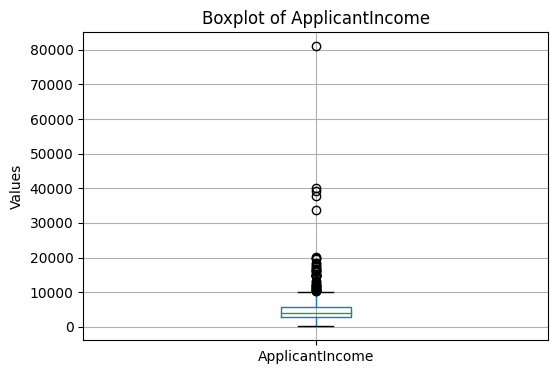

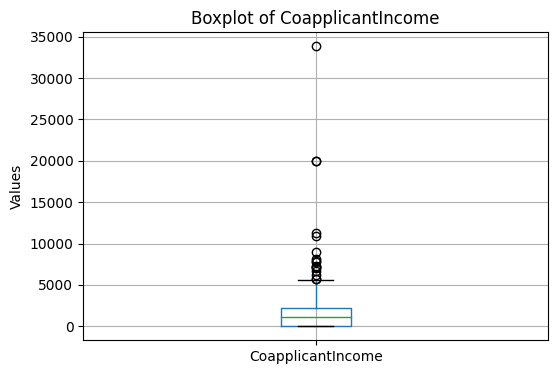

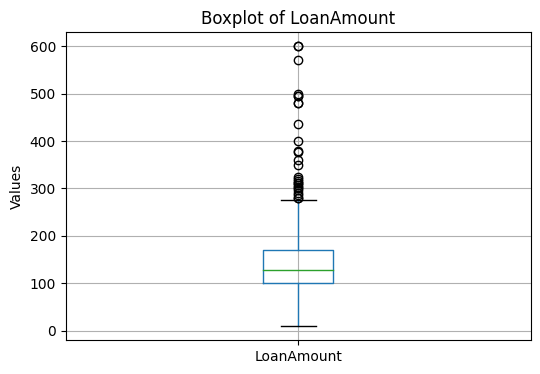

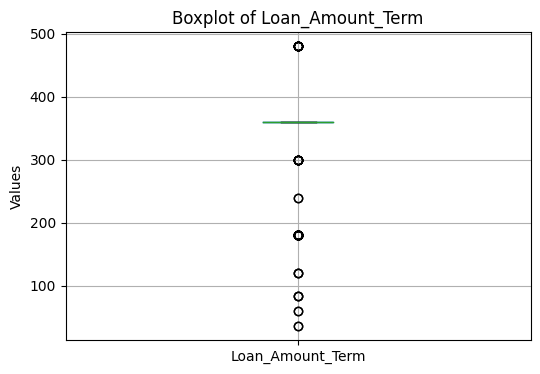

In [49]:
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for column in columns:
    plt.figure(figsize=(6, 4))
    data.boxplot(column=[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Values')
    plt.show()

In [50]:
data['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,411
180.0,36
480.0,12
300.0,9
120.0,3
84.0,3
60.0,2
240.0,2
36.0,2


In [88]:
#  X와 y 설정
X = data.iloc[:, :-1].values  # 마지막 열 제외
y = data.iloc[:, -1].values  # 마지막 열

#  훈련 데이터와 테스트 데이터 분할 (stratify로 클래스 비율 유지)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  범주형 변수를 제외한 수치형 열에 대해 스케일링 적용
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)


class MultiLayerRegression(nn.Module):
    def __init__(self):
        super(MultiLayerRegression, self).__init__()

        self.linear1 = nn.Linear(X_train.shape[1], 40)
        self.activate1 = nn.ReLU()
        self.linear2 = nn.Linear(40, 80)
        self.activate2 = nn.ReLU()
        self.linear3 = nn.Linear(80, 40)
        self.activate3 = nn.ReLU()
        self.linear4 = nn.Linear(40, 40)
        self.activate4 = nn.ReLU()




        self.linear5 = nn.Linear(40, len(set(y)))

    def forward(self, x):
        out1 = self.linear1(x)
        out2 = self.activate1(out1)
        out3 = self.linear2(out2)
        out4 = self.activate2(out3)
        out5 = self.linear3(out4)
        out6 = self.activate3(out5)
        out7 = self.linear4(out6)
        out8 = self.activate4(out7)
        out9 = self.linear5(out8)
        return out9

model = MultiLayerRegression()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

patience = 10
best_loss = float('inf')
early_stop_counter = 0

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        train_loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            val_loss += loss.item()

    val_loss /= len(test_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss.item():.4f}, Val Loss: {val_loss:.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), "best_model.pth")

    else:
        early_stop_counter += 1

    if early_stop_counter >= patience:
        print("Early stopping triggered")
        break


model.load_state_dict(torch.load("best_model.pth"))
model.eval()
with torch.no_grad():
    y_pred = []
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)


Epoch 1/100, Loss: 0.7284, Val Loss: 0.5390
Epoch 2/100, Loss: 1.4790, Val Loss: 0.4532
Epoch 3/100, Loss: 0.1537, Val Loss: 0.4463
Epoch 4/100, Loss: 0.2402, Val Loss: 0.4525
Epoch 5/100, Loss: 0.1121, Val Loss: 0.4587
Epoch 6/100, Loss: 0.3131, Val Loss: 0.4727
Epoch 7/100, Loss: 0.1383, Val Loss: 0.4551
Epoch 8/100, Loss: 0.2931, Val Loss: 0.4773
Epoch 9/100, Loss: 0.1055, Val Loss: 0.4743
Epoch 10/100, Loss: 0.1962, Val Loss: 0.4925
Epoch 11/100, Loss: 0.2623, Val Loss: 0.5921
Epoch 12/100, Loss: 0.1664, Val Loss: 0.5517
Epoch 13/100, Loss: 0.1222, Val Loss: 0.5383
Early stopping triggered
Accuracy: 0.8438
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.57      0.69        30
           1       0.83      0.97      0.90        66

    accuracy                           0.84        96
   macro avg       0.86      0.77      0.79        96
weighted avg       0.85      0.84      0.83        96



<ipython-input-88-17bb021ad3a6>:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


<ipython-input-89-54e759e22e7e>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


Accuracy: 0.8438
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.57      0.69        30
           1       0.83      0.97      0.90        66

    accuracy                           0.84        96
   macro avg       0.86      0.77      0.79        96
weighted avg       0.85      0.84      0.83        96



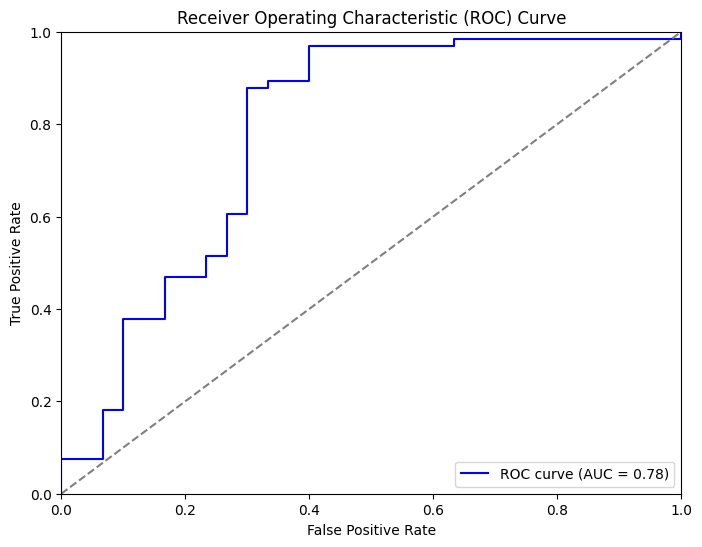

In [89]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report

# 모델 로드 및 평가 설정
model.load_state_dict(torch.load("best_model.pth"))
model.eval()

y_pred = []
y_prob = []  # 확률을 저장할 리스트
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        probabilities = torch.softmax(outputs, dim=1)[:, 1]  # 클래스 1에 대한 확률을 추출
        y_prob.extend(probabilities.numpy())  # 확률값 저장
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())  # 예측값 저장

# 정확도 및 분류 보고서 출력
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# ROC 커브 그리기
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # 실제값과 확률값 사용
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 기준선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [90]:
#  X와 y 설정
X = data.iloc[:, :-1].values  # 마지막 열 제외
y = data.iloc[:, -1].values  # 마지막 열

#  훈련 데이터와 테스트 데이터 분할 (stratify로 클래스 비율 유지)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  범주형 변수를 제외한 수치형 열에 대해 스케일링 적용
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)


class MultiLayerRegression(nn.Module):
    def __init__(self):
        super(MultiLayerRegression, self).__init__()

        self.linear1 = nn.Linear(X_train.shape[1], 40)
        self.activate1 = nn.ReLU()
        self.linear2 = nn.Linear(40, 80)
        self.activate2 = nn.ReLU()
        self.linear3 = nn.Linear(80, 40)
        self.activate3 = nn.ReLU()
        self.linear4 = nn.Linear(40, 40)
        self.activate4 = nn.ReLU()




        self.linear5 = nn.Linear(40, 1)
    def forward(self, x):
        out1 = self.linear1(x)
        out2 = self.activate1(out1)
        out3 = self.linear2(out2)
        out4 = self.activate2(out3)
        out5 = self.linear3(out4)
        out6 = self.activate3(out5)
        out7 = self.linear4(out6)
        out8 = self.activate4(out7)
        out9 = self.linear5(out8)
        return out9



model = MultiLayerRegression()

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

patience = 10
best_loss = float('inf')
early_stop_counter = 0

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        #print(y_pred, y_batch)
        train_loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            val_loss += loss.item()

    val_loss /= len(test_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss.item():.4f}, Val Loss: {val_loss:.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), "best_model_1.pth")

    else:
        early_stop_counter += 1

    if early_stop_counter >= patience:
        print("Early stopping triggered")
        break




Epoch 1/100, Loss: 1.6647, Val Loss: 0.4830
Epoch 2/100, Loss: 0.1552, Val Loss: 0.4493
Epoch 3/100, Loss: 0.1799, Val Loss: 0.4476
Epoch 4/100, Loss: 1.5018, Val Loss: 0.4466
Epoch 5/100, Loss: 0.0914, Val Loss: 0.4529
Epoch 6/100, Loss: 0.1006, Val Loss: 0.4584
Epoch 7/100, Loss: 0.1549, Val Loss: 0.5156
Epoch 8/100, Loss: 0.0946, Val Loss: 0.4863
Epoch 9/100, Loss: 0.2903, Val Loss: 0.4963
Epoch 10/100, Loss: 0.1488, Val Loss: 0.5638
Epoch 11/100, Loss: 1.0593, Val Loss: 0.5090
Epoch 12/100, Loss: 0.1405, Val Loss: 0.5529
Epoch 13/100, Loss: 2.6632, Val Loss: 0.5546
Epoch 14/100, Loss: 0.1144, Val Loss: 0.5332
Early stopping triggered


In [91]:


model.load_state_dict(torch.load("best_model_1.pth"))
model.eval()

y_true = []
y_pred_all = []

with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        # 모델 예측
        y_pred = model(X_batch)
        y_pred = torch.sigmoid(y_pred)  # 시그모이드를 사용하여 확률값 계산
        y_pred = (y_pred > 0.5).float()  # 0.5를 기준으로 이진 분류

        # 예측값과 실제값을 리스트에 저장
        y_true.extend(y_batch.numpy())  # 실제값 저장
        y_pred_all.extend(y_pred.numpy())  # 예측값 저장

        # 정확도 계산
        correct += (y_pred == y_batch).sum().item()
        total += y_batch.size(0)

    # 정확도 출력
    accuracy = correct / total
    print(f'Accuracy: {accuracy:.4f}')

    # classification_report 출력
    report = classification_report(y_true, y_pred_all)
    print("Classification Report:")
    print(report)


Accuracy: 0.8438
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.57      0.69        30
         1.0       0.83      0.97      0.90        66

    accuracy                           0.84        96
   macro avg       0.86      0.77      0.79        96
weighted avg       0.85      0.84      0.83        96



<ipython-input-91-91aca17ccdfc>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model_1.pth"))


###  위 코드에서 어떤 기법들을 썼었고 왜 그것들을 썼는지 서술 하시오.

In [ ]:
# 이 데이터는 이진 분류지만 소프트맥스와 시그모이드를 둘 다 써서 차이를 보고 싶었다.
# 전처리)
# 결측치를 임의로 채울 수 없어서 모두 drop
# 박스플롯을 그려 보았을 때 이상치가 있었으나 고유의 특성이라 판단해서 제거하지 않음
# standard스케일링을 통해 정규화

# 소프트맥스, 시그모이드)
# 레이어 수는 히든 4층
# 노드는 40 80 40 40
# 활성함수는 렐루
# 옵티마이저는 아담
# 러닝레이트는 0.0005
# 배치사이즈는 1  # 데이터가 적어서 1로 해도 시간이 별로 안걸릴꺼 같아서
# 에폭은 100
# 얼리스탑은 10

'''
# 소프트맥스
Accuracy: 0.8438
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.57      0.69        30
           1       0.83      0.97      0.90        66

    accuracy                           0.84        96
   macro avg       0.86      0.77      0.79        96
weighted avg       0.85      0.84      0.83        96
'''
'''
# 시그모이드
Accuracy: 0.8438
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.57      0.69        30
         1.0       0.83      0.97      0.90        66

    accuracy                           0.84        96
   macro avg       0.86      0.77      0.79        96
weighted avg       0.85      0.84      0.83        96
'''

# 두 지표를 비교했을때 똑같다